# Two holes interferometer.

In [1]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

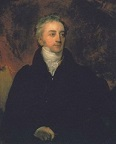
*Thomas Young (Milverton, 1773 – London, 1829)*

When a screen with two small holes (or slits) is illuminated by a monochromatic beam 
of light an interference pattern can be observed on a screen some distance from the holes. 
This experiment is also called Young's experiment.
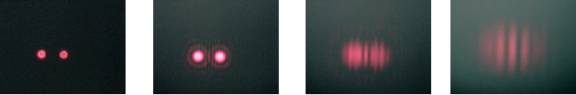
*Fringes from a Young’s interferometer as observed in the lab. From left to right the distance between the CCD camera and the holes is increased. It can be seen that the two spherical waves emitted from the holes overlap and interfere better at larger distances.*

Two experiments can be performed:

### Measurement of the wavelength.
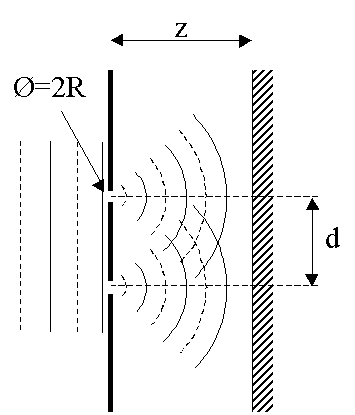
*Young's experiment.*
    
   1.  Derive an expression that relates the distance between the fringes that can be observed 
        on the screen to the wavelength of the light illuminating the holes, 
        the distance to the observation screen, $z$, and the separation, $d$, of the two holes.
   2.  Measure the wavelength of the light beam. Vary the values of values of 
        $d$ and $z$ for this. Remember to choose values for $d$ and $z$ such that the theory is valid. 
        Estimate the experimental error you have to make 
        (the main source of experimental errors will be, in this case, the read out of the 
        mouse-position on the interference pattern.)

### Measurement of the thickness of a thin film that covers one of the holes.

With the second experiment a thin film is positioned in front of one of the holes. 
As depicted in the figure below the lower part of the incoming plane wave will travel 
along a longer optical path and will have a retarded phase compared to the upper part. 
As a consequence the theory of the Young’s interferometer must be modified taking into 
account the extra phase. With the film, maximum and minimum irradiance at the screen will 
now occur at different places and as a result the fringes are shifted. From the shift of 
the fringe pattern the film thickness can be determined if the refractive index of the 
film is known.

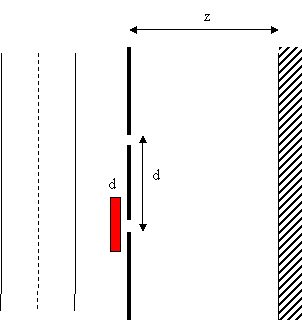
*Young's experiment with thin film before one of the holes.*
    
   1.  A thin, transparent film with refractive index 1.5 can be positioned before one of the holes. 
        Modify the theory to take into account the extra phase shift caused by the film.
   2.  With this experiment you cannot determine the exact thickness of the film, 
        but you can find a discrete set of thicknesses the film can have. 
        Report the minimum thickness that this film can have.
   3.  What values of the thickness of the film are possible too?

### Questions.

   1.  What condition must be fulfilled for the distance, $z$, to the screen, the wavelength 
        of the light, and the size of the holes for the theory that you used?
   2.  What happens to the fringes if the beam of light is not monochromatic but contains a 
        large number of wavelengths? How many fringes will be visible for white light?

You should be able to answer the following questions at the end of the course (Try to answer 
them now if you can!):

   3.  In relation with question 1: What type of diffraction are we talking about here?
   4.  What will happen with the fringes if the spatial coherency of the beam is poor? 
        (This means that there is no relation between the phases of the wavefront just before 
        the two holes)
   5.  Suppose that the coherent (laser) light is replaced by quasi monochromatic light 
        such as a line from a mercury lamp. How can you prepare this light such that you can observe fringes?
   6.  With the mercury lamp of the previous question, what will happen to the fringes if 
        the thin film before one of the holes is replaced by a thick glass plate?

Literature: Pedrotti, 3rd ed., chapter 7-2. https://www.amazon.com/Introduction-Optics-3rd-Frank-Pedrotti/dp/0131499335

<IPython.core.display.Javascript object>


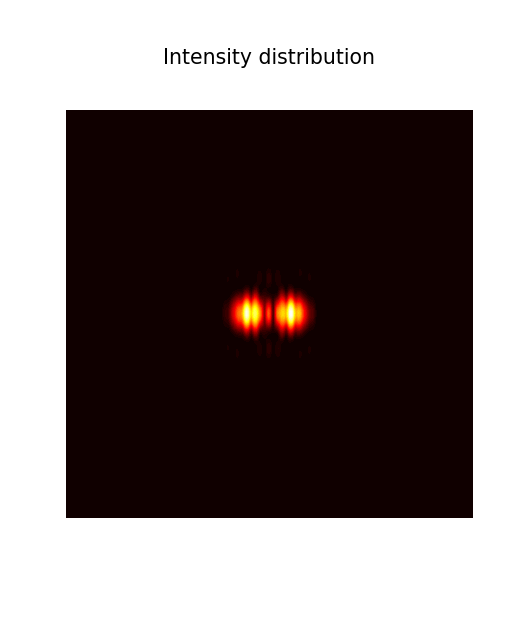

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='D [mm]', max=1.0, min=0.1, …

In [1]:
%matplotlib notebook
#!/usr/bin/env python
"""
    Computer practical 3. Two holes interferometer, Young's experiment.
    ====================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates a two holes interferometer (Young's experiment)
    Measure the positions of minima and/or maxima. Study the effect of
    placing a thin glass in front of one of the holes.
    
    ..  :copyright: (c) 2017 by Fred van Goor.
    :license: MIT, see License for more details.
    
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from LightPipes import *

wavelength=530*nm;
size=10*mm;
N=300;

fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def TwoHolesSim(D,d,z,phiCheck):
    R=D/2*mm
    d=d*mm
    z=z*cm
    if phiCheck:
        phi = 0.8
    else:
        phi = 0.0
    F=Begin(size,wavelength,N);
    F1=CircAperture(R,-d/2,0,F);
    Phi = Phase(F);
    for i in range (1,N):
        for j in range(1,N):
            Phi[i][j] = phi;
    F1 = SubPhase(Phi, F1);
    F2=CircAperture(R,d/2,0,F);
    F=BeamMix(F1,F2);
    F=Fresnel(z,F);
    I=Intensity(1,F);
    ax.contourf(I,50,cmap='hot')
    ax.axis('off'); ax.axis('equal');
    str='Intensity distribution'
    ax.set_title(str)
    ax.format_coord = lambda x, y: 'x = %2.2f mm, y = %2.2f mm, Intensity = %2.4f a.u.' % ((-size/2 + x*size/N)/mm, (-size/2 + y*size/N)/mm, I[int(x)][int(y)])
    plt.show()

w=interact(TwoHolesSim,
           phiCheck=widgets.Checkbox(value=False, description='Place glass', disabled=False),
           D=widgets.FloatSlider(description='D [mm]',min=0.1,max=1.0,step=0.001,value=0.04,continuous_update=False,readout_format='.2f'),
           d=widgets.FloatSlider(description='d [mm]',min=0.05,max=1.5,step=0.001,value=0.5,continuous_update=False,readout_format='.2f'),
           z=widgets.FloatSlider(description='z [cm]',min=0.01,max=200.0,step=0.01,value=90.0,continuous_update=False,readout_format='.1f'),
          );


